In [36]:
import math

import matplotlib.pyplot as plt

import mujoco_toolbox as mjtb
from mujoco_toolbox.wrapper import mjData  # Type hints

In [37]:
mjtb.CAPTURE_PARAMETERS = "all"

In [38]:
Vnom = 6
G = 55.5
t_stall = 15 / 100 / G
i_stall = 0.6
R = Vnom / i_stall

kt = t_stall / i_stall
ke = kt

V_control = 5

b_fit = 1.404e-6
kp_fit = 8.896

In [39]:
def leg_controller(_, data:mjData) -> None:
    """Simple leg controller for the MuJoCo model."""
    # Current state
    w = data.qvel[1]  # Current velocity of joint 1
    actual = data.qpos[1]  # Current position of joint 1

    desired = math.pi if data.time > 1 else 0

    error = desired - actual

    v = kp_fit * error

    v = max(min(v, V_control), -V_control)

    torque = (kt * (v - (ke * w * G)) / R - b_fit * w * G) * G

    data.ctrl[0] = torque  # control first joint

In [40]:
IC = {"qpos": [0, 0, 0]}

model = mjtb.Wrapper(xml="../tests/models/box_and_leg.xml",
                     duration=2,
                     fps=30,
                     resolution=(640, 480),
                     initial_conditions=IC,
                     controller=leg_controller,
                    ).run(render=True)

In [41]:
model

Wrapper(
  Duration: 2s [fps=30, ts=1e-04]
  Gravity: [ 0.    0.   -9.81],
  Resolution: 640W x 480H
  Bodies (5): world, body_1, leg_1, leg_2, floor
  Joints (3): prismatic_1, joint_1, joint_2
  Actuators (1): motor_1
  Controller: leg_controller
)

In [42]:
len(model.frames)

61

""

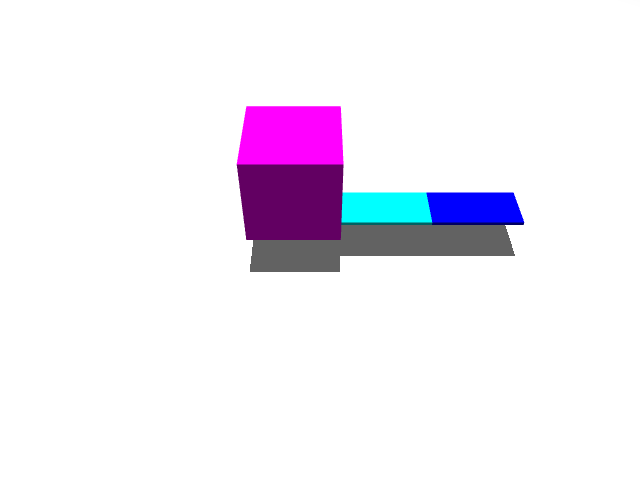

In [43]:
model.show()

Max Qpos

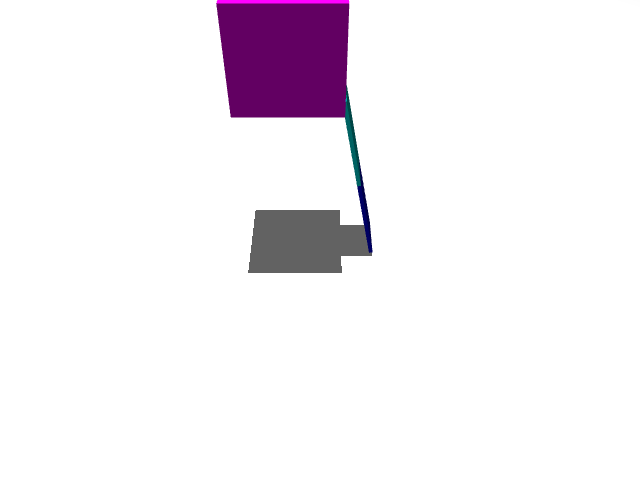

In [44]:
time_of_max_qpos = model.captured_data["time"][model.captured_data["qpos"][:, 0].argmax()]

model.show(time_idx=time_of_max_qpos, title="Max Qpos")

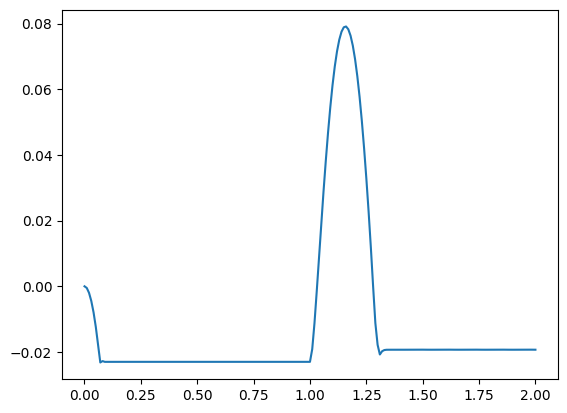

In [45]:
plt.plot(model.captured_data["time"], model.captured_data["qpos"][:, 0])
plt.show()